In [1]:
import sympy as sp
from sympy import sqrt, I
sp.init_printing(use_latex='mathjax')
from IPython.display import display

In [66]:
omega = sp.Symbol('omega', real = True)
omegad = sp.Symbol('omega_d', real = True)
t = sp.Symbol('t', real = True)
a = sp.Symbol('a', real = True)
x = sp.Symbol('x', real = True)
z1 = sp.Symbol('zeta_1', real = True)
z2 = sp.Symbol('zeta_2', real = True)

### Problem 1  

**Fourier transform for the double strike looks like the following.**  

**$F = 1 + e^{-\omega \Delta T J}$**  

**The issue with a double strike is that at a certain $\Delta T$ when the second strike occurs the conditions can be such that the two strikes cancel each other and cause the system to come to a rest or very close to a rest position.**  

**This condition is illustrated in the graph below. If the frequency of the system $\omega = 2\pi$, then if a second hit occurs at $\Delta T = 0.5$ seconds the two strikes will cancel out and the system comes to rest.**  

**There will be other combinations of $\Delta T$ and $\omega$ for which this will be the case.**

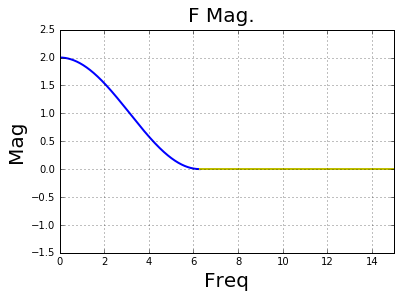

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

w1 = np.linspace(0, 2*np.pi, 1000)
w2 = np.linspace(2*np.pi, 20, 500)

#Define imaginary unit
J=np.sqrt(-1+0j)

F = 1 + np.exp(-w1*.5*J)
F1 = 1 + np.exp(-w2*.5*J)

fig=plt.figure()
plt.plot(w1, F.real, 'b-', linewidth=2)
#plt.plot(w1, F.imag, 'r--', linewidth=3)
plt.plot(w2, F1.real-F1.real, 'y-', linewidth=2)

fig.suptitle('F Mag.', fontsize=20)
plt.xlabel('Freq', fontsize=20)
plt.ylabel('Mag', fontsize=20)
plt.axis([0, 15, -1.5, 2.5])

plt.grid()
plt.show()

### Problem 2

**Because of the absolute value in the PDF expression it was seperated into two distinct ranges as seen below:**  

- $PDF = A(1+\frac{x}{a})$, for range $-a\le x \le 0$.
- $PDF = A(1-\frac{x}{a})$, for range $0\le x \le a$.  

**Part (a) was obtained during class test duration and is $A=\frac{1}{a}$. This value is used in calculations below.**

In [73]:
CDF=sp.integrate((1/a)*(1-x/a), (x, 0, a))+sp.integrate((1/a)*(1+x/a), (x, -a, 0))
CDF.expand()

1

**Calculate mean.**

In [83]:
mean = sp.integrate(x*((1/a)*(1+x/a)), (x, -a, 0)) + sp.integrate(x*((1/a)*(1-x/a)), (x, 0, a))
mean

0

**Calculate standard deviation.**

In [129]:
var = (sp.integrate(x**2*((1/a)*(1+x/a)), (x, -a, 0)) + sp.integrate(x**2*((1/a)*(1-x/a)), (x, 0, a)))
stdev = sqrt(var)
#display(var)
stdev

  ___    
╲╱ 6 ⋅│a│
─────────
    6    

**Calculate kurtosis.**

In [130]:
k = sp.integrate(x**4*((1/a)*(1+x/a)), (x, -a, 0)) + sp.integrate(x**4*((1/a)*(1-x/a)), (x, 0, a))
#display(k)
k/(var**2)

12/5

### Problem 3

**The calculated mode shapes are defined below based on the hand written work.**

In [50]:
phi1 = sp.Matrix([sqrt(0.0002*z1), 0.00015*z1/(sqrt(0.0002*z1))])
phi1

⎡                    ____ ⎤
⎢0.014142135623731⋅╲╱ ζ₁  ⎥
⎢                         ⎥
⎢                     ____⎥
⎣0.0106066017177982⋅╲╱ ζ₁ ⎦

In [51]:
phi2 = sp.Matrix([sqrt(0.00064*z2), -0.00048*z2/(sqrt(0.00064*z2))])
phi2

⎡                     ____ ⎤
⎢ 0.025298221281347⋅╲╱ ζ₂  ⎥
⎢                          ⎥
⎢                      ____⎥
⎣-0.0189736659610103⋅╲╱ ζ₂ ⎦

**Next create matrix $\Psi$ in order to obtain Mass and Stiffness matrices ($M\ and\ K$).**

In [52]:
Phi = sp.Matrix([[sqrt(0.0002*z1), sqrt(0.00064*z2)],[0.00015*z1/(sqrt(0.0002*z1)), -0.00048*z2/(sqrt(0.00064*z2))]])
Phi

⎡                    ____                        ____ ⎤
⎢0.014142135623731⋅╲╱ ζ₁     0.025298221281347⋅╲╱ ζ₂  ⎥
⎢                                                     ⎥
⎢                     ____                        ____⎥
⎣0.0106066017177982⋅╲╱ ζ₁   -0.0189736659610103⋅╲╱ ζ₂ ⎦

**Based on equation 1.180 form the manuscript we know following relationships:**  

- $\Psi^T M\Psi = I$, so $M = \Psi^{-T}I\Psi^{-1}$
- $\Psi^T K\Psi = \Omega^2$, so $K = \Psi^{-T}\Omega^2\Psi^{-1}$  

**Next take inverse of $\Psi$. I know we should not take inverses but for 2 by 2 case it is acceptable.**

In [53]:
Phi_inv = Phi.inv()
Phi_inv

⎡35.3553390593274   47.1404520791032 ⎤
⎢────────────────   ──────────────── ⎥
⎢       ____               ____      ⎥
⎢     ╲╱ ζ₁              ╲╱ ζ₁       ⎥
⎢                                    ⎥
⎢19.7642353760524  -26.3523138347365 ⎥
⎢────────────────  ──────────────────⎥
⎢       ____               ____      ⎥
⎣     ╲╱ ζ₂              ╲╱ ζ₂       ⎦

**Since mode shapes are mass normalized the mass matrix $M$ will be the identity matrix as seen below.**

In [54]:
I1=sp.Matrix([[1,0],[0,1]])
I1

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

**Applying expression $M = \Psi^{-T}I\Psi^{-1}$ gives following expression for $M$.**

In [56]:
M=Phi_inv.T*I1*Phi_inv
M.evalf(4)

⎡    390.6   1250.0        -520.8⋅(-1)   1667.0⎤
⎢    ───── + ──────      - ─────────── + ──────⎥
⎢      ζ₂      ζ₁               ζ₂         ζ₁  ⎥
⎢                                              ⎥
⎢  -520.8⋅(-1)   1667.0      694.4   2222.0    ⎥
⎢- ─────────── + ──────      ───── + ──────    ⎥
⎣       ζ₂         ζ₁          ζ₂      ζ₁      ⎦

**Next check following conditions.**  

- $\psi_1^TM\psi_1 = 1$
- $\psi_2^TM\psi_2 = 1$

In [58]:
check1 = phi1.T*M*phi1
check1[0].simplify()

1.00000000000000

In [60]:
check2 = phi2.T*M*phi2
check2[0].simplify()

1.00000000000000

**Now get $K$ matrix with expression $K = \Psi^{-T}\Omega^2\Psi^{-1}$.**

In [36]:
Omega=sp.Matrix([[75**2, 0],[0, 490**2]])
Omega

⎡5625    0   ⎤
⎢            ⎥
⎣ 0    240100⎦

In [62]:
K=Phi_inv.T*Omega*Phi_inv
K

⎡       93789062.5   7031250.0           -125052083.333333⋅(-1)   9375000.0⎤
⎢       ────────── + ─────────         - ────────────────────── + ─────────⎥
⎢           ζ₂           ζ₁                        ζ₂                 ζ₁   ⎥
⎢                                                                          ⎥
⎢  -125052083.333333⋅(-1)   9375000.0     166736111.111111   12500000.0    ⎥
⎢- ────────────────────── + ─────────     ──────────────── + ──────────    ⎥
⎣            ζ₂                 ζ₁               ζ₂              ζ₁        ⎦

### Problem 4

**It is next to impossible to hit the exact same spot while using the hammer to excite the system. Therefore, zero locations will be different for each dataset collected. The best outcome possible is to define a confidence interval of where the zero may lie based on multiple datasets.**

In [64]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')